In [1]:
# Mount googl drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data from csv file
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fund_ML/land_price_2.csv').to_numpy()

print(data.shape)

x = data[:, 0]
y = data[:, 1]

print('x:', x.shape)
print('y:', y.shape)

(30, 2)
x: (30,)
y: (30,)


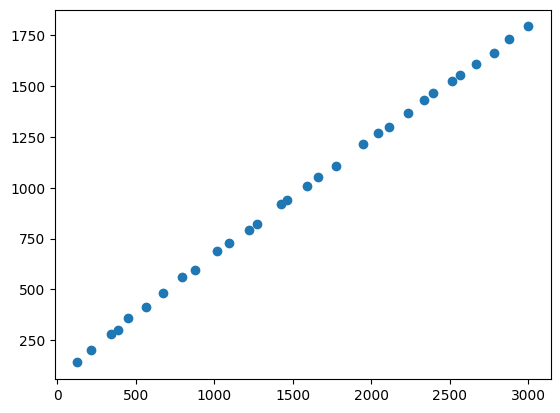

In [3]:
# Plot
plt.scatter(x, y)
plt.show()

In [4]:
#feature scaling
def feature_scaling(x):
  mu = np.mean(x, axis=0) #np(n)
  x = (x-mu)/(np.max(x, axis=0)-np.min(x, axis=0))
  return x

x0 = np.ones((x.shape[0], 1))
x1 = x.reshape(-1, 1)
x2 = np.sqrt(x).reshape(-1, 1)

tmp = np.concatenate((x1, x2), axis=1)
x_scaled = feature_scaling(tmp)

x_scaled = np.concatenate((x0, x_scaled), axis=1)
print(x_scaled.shape)

(30, 3)


In [10]:
import torch

theta = torch.zeros(x_scaled.shape[1], dtype=torch.float32) # tensor(3)

theta.requires_grad_(True)

alpha = 0.9

# print(theta)

tx = torch.tensor(x_scaled, dtype=torch.float32) # tensor(30, 3)
ty = torch.tensor(y, dtype=torch.float32) # tensor(30)

# print(tx.shape)
# print(ty.shape)

for i in range(10000):
  tz = torch.matmul(tx, theta.reshape(-1, 1)).flatten() # tensor(30)
  J = torch.mean((tz - ty) ** 2)
  J.backward()

  # turn it off in order to compute without effect computational graph
  # theta.requires_grad_(False)
  # theta += -alpha * theta.grad

  # Or we can use no_grad
  with torch.no_grad():
    theta -= alpha * theta.grad
  theta.grad.zero_() # reset gradient to zero

  if i % 10 == 0:
    print(f'{i}:, {J.item()}')

0:, 1199843.375
10:, 12054.1044921875
20:, 963.4615478515625
30:, 804.1082153320312
40:, 770.4039306640625
50:, 739.4772338867188
60:, 709.8556518554688
70:, 681.469482421875
80:, 654.2681884765625
90:, 628.2025146484375
100:, 603.223388671875
110:, 579.2867431640625
120:, 556.3480224609375
130:, 534.3672485351562
140:, 513.3031616210938
150:, 493.1176452636719
160:, 473.7734375
170:, 455.2374572753906
180:, 437.4745178222656
190:, 420.45257568359375
200:, 404.1408996582031
210:, 388.5099792480469
220:, 373.5307312011719
230:, 359.1763000488281
240:, 345.4213562011719
250:, 332.2391662597656
260:, 319.6075744628906
270:, 307.5033874511719
280:, 295.9033203125
290:, 284.78778076171875
300:, 274.1357727050781
310:, 263.9280700683594
320:, 254.14666748046875
330:, 244.77256774902344
340:, 235.79000854492188
350:, 227.18214416503906
360:, 218.93328857421875
370:, 211.02911376953125
380:, 203.45433044433594
390:, 196.1952362060547
400:, 189.23936462402344
410:, 182.57350158691406
420:, 176.